# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

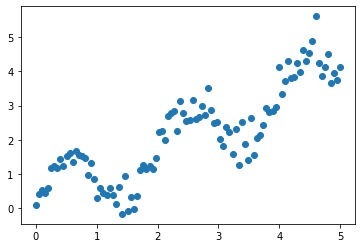

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5345151797584587


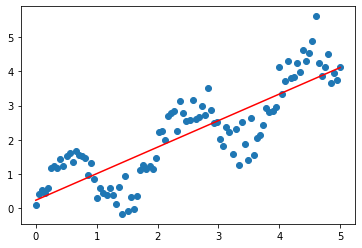

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

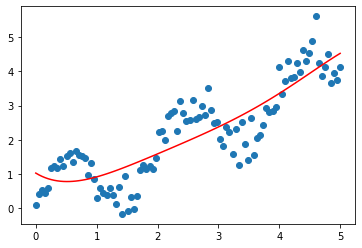

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.07728433  1.4127286  -0.53933842  0.10003473 -0.00689157]
interception:  1.0241933089139454


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.02419331, 0.97331971, 0.92924533, 0.89157638, 0.85993414,
       0.8339547 , 0.81328868, 0.79760096, 0.78657043, 0.77988966,
       0.77726471, 0.77841478, 0.783072  , 0.79098111, 0.80189922,
       0.81559553, 0.83185104, 0.85045833, 0.87122121, 0.89395453,
       0.91848383, 0.94464514, 0.97228466, 1.00125851, 1.03143244,
       1.06268159, 1.09489018, 1.12795128, 1.16176648, 1.19624569,
       1.23130681, 1.26687548, 1.30288482, 1.33927514, 1.37599368,
       1.41299432, 1.45023732, 1.48768908, 1.5253218 , 1.56311326,
       1.60104655, 1.63910976, 1.67729573, 1.7156018 , 1.7540295 ,
       1.7925843 , 1.83127534, 1.87011514, 1.90911934, 1.94830644,
       1.98769752, 2.02731594, 2.06718712, 2.10733822, 2.1477979 ,
       2.18859605, 2.22976349, 2.27133171, 2.31333261, 2.35579823,
       2.39876045, 2.44225076, 2.48629995, 2.53093785, 2.57619307,
       2.62209273, 2.66866216, 2.71592465, 2.76390119, 2.81261017,
       2.86206713, 2.91228446, 2.96327118, 3.0150326 , 3.06757

In [15]:
regr_poly.predict(X_poly)

array([1.02419331, 0.97331971, 0.92924533, 0.89157638, 0.85993414,
       0.8339547 , 0.81328868, 0.79760096, 0.78657043, 0.77988966,
       0.77726471, 0.77841478, 0.783072  , 0.79098111, 0.80189922,
       0.81559553, 0.83185104, 0.85045833, 0.87122121, 0.89395453,
       0.91848383, 0.94464514, 0.97228466, 1.00125851, 1.03143244,
       1.06268159, 1.09489018, 1.12795128, 1.16176648, 1.19624569,
       1.23130681, 1.26687548, 1.30288482, 1.33927514, 1.37599368,
       1.41299432, 1.45023732, 1.48768908, 1.5253218 , 1.56311326,
       1.60104655, 1.63910976, 1.67729573, 1.7156018 , 1.7540295 ,
       1.7925843 , 1.83127534, 1.87011514, 1.90911934, 1.94830644,
       1.98769752, 2.02731594, 2.06718712, 2.10733822, 2.1477979 ,
       2.18859605, 2.22976349, 2.27133171, 2.31333261, 2.35579823,
       2.39876045, 2.44225076, 2.48629995, 2.53093785, 2.57619307,
       2.62209273, 2.66866216, 2.71592465, 2.76390119, 2.81261017,
       2.86206713, 2.91228446, 2.96327118, 3.0150326 , 3.06757

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

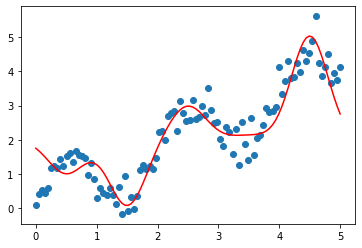

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.98593321 -1.91998495  0.99397241  0.12972171  3.03548889]
interception:  1.9961105693253736


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

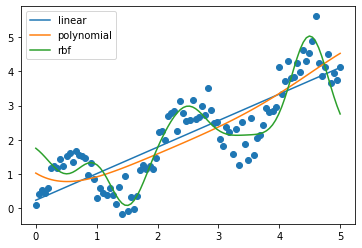

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5345151797584587


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.47954223503254495


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2779847985239078
